# Titanic - Machine Learning (1st Project) 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
import scipy
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
%matplotlib inline

#survival 0 = NO , 1 = YES
#pclass Ticket Class (1st is upper)
#sibsp # of siblings(brother, sister, stepbrother) / spouses (husban wife) aboard the titanic
#parch # of parents/children aboard the titanic. Parth 0 = nany travelled
#ticket number
#fare passenger fare (taxa)
#cabin number (certamente terá a ver com a taxa paga)
#embarked in Cherbourg (C) , Queenstown (Q), Southampton (S)

In [0]:
#titanic = pd.read_csv('C:\\Users\\Tiago\\Desktop\\Data Analysis\\DataRaw\\Titanic ML\\train.csv')
#titanic.head(3)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
import io
titanic = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [6]:
print(titanic.dtypes)
len(titanic)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


891

# Scrub Data

In [7]:
titanic['Sex'] = titanic.Sex.replace({'male': '1', 'female':'0'}).astype(int)
titanic['ClassAge'] = titanic['Pclass']*titanic['Age']
print(titanic.dtypes)
#print(titanic.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
ClassAge       float64
dtype: object


In [8]:
titanic.describe()
#média de idades são 29,6 anos
#cerca de 38% sobreviveram
#metade das pessoas tem meio sibling
#64% sexo masculino

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,ClassAge
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,714.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,61.938151
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,34.379609
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.920000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,38.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,58.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,81.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,222.000000


In [9]:
titanic.median()
#grande parte das pessoas são da 3ª classe
#grande parte do sexo é masculino
#o valor médio da idade é 28

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Sex              1.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
ClassAge        58.0000
dtype: float64

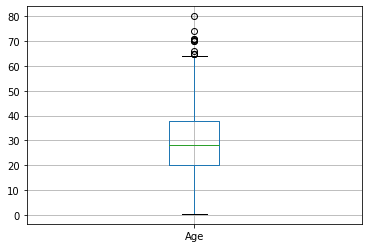

In [10]:
titanic.boxplot('Age')
#retirar o 80 e 70 e tal? 

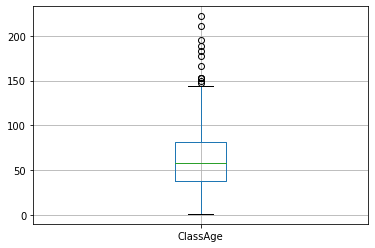

In [11]:
titanic.boxplot('ClassAge')

In [12]:
#NaN rows and cells, what we have
#177 pessoas sem dados sobre a idade
#687 pessoas sem dados sobre a cabine
titanic.isnull().tail()
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
ClassAge       177
dtype: int64

In [13]:
titanic[titanic.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ClassAge
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,NaN
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S,NaN
19,20,1,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,NaN,C,NaN
26,27,0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,C,NaN
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,NaN,Q,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",1,NaN,0,0,2629,7.2292,NaN,C,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",0,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN
868,869,0,3,"van Melkebeke, Mr. Philemon",1,NaN,0,0,345777,9.5000,NaN,S,NaN
878,879,0,3,"Laleff, Mr. Kristo",1,NaN,0,0,349217,7.8958,NaN,S,NaN


In [14]:
titanic.dropna(how='all').shape
#nenhuma seria eliminada 
#caso fosse any, apenas restavam 150 dados

(891, 13)

In [15]:
#pareto de valores e atributos
titanic['Cabin'].value_counts(dropna=False).head(5)

NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
Name: Cabin, dtype: int64

In [16]:
#titanic['CabinSimp'] = titanic.Sex.replace({'male': '1', 'female':'0'}).astype(int)
#titanicplot = titanic.sort_values(by=['Cabin'])
titanic['CabinSimp'] = titanic.Cabin.str[:1]
titanicplot = titanic.sort_values(by=['CabinSimp'])
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ClassAge,CabinSimp
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,66.0,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C


IndexError: ignored

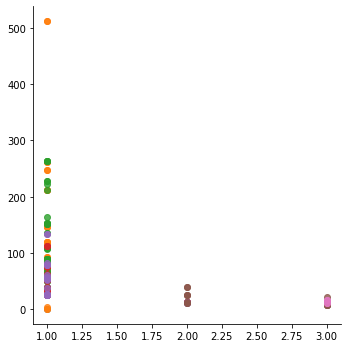

In [17]:
vis1 = sns.lmplot (data = titanicplot, x = 'Pclass', y = 'Fare', 
                   fit_reg=False, hue = 'CabinSimp')

In [18]:
crosstabclass = pd.crosstab(titanic['CabinSimp'], titanic['Pclass'])
crosstabclass

Pclass,1,2,3
CabinSimp,,,
A,15,0,0
B,47,0,0
C,59,0,0
D,29,4,0
E,25,4,3
F,0,8,5
G,0,0,4
T,1,0,0


In [19]:
stats.chi2_contingency(crosstabclass)
#existe evidências para rejeitar o H0 e afirmar que existe relação entre a classe e a cabine
#no entanto existe frequencias abaixo dos 5, ou seja não o chi square não pode ser confiado

(170.3864480689765,
 5.720886022010114e-29,
 14,
 array([[12.94117647,  1.17647059,  0.88235294],
        [40.54901961,  3.68627451,  2.76470588],
        [50.90196078,  4.62745098,  3.47058824],
        [28.47058824,  2.58823529,  1.94117647],
        [27.60784314,  2.50980392,  1.88235294],
        [11.21568627,  1.01960784,  0.76470588],
        [ 3.45098039,  0.31372549,  0.23529412],
        [ 0.8627451 ,  0.07843137,  0.05882353]]))

In [20]:
#verificar quantos dados de 1ª classe existem com Null nas cabines. 
#se verificar que os dados de 1ª classe estão preenchidos comparativamente aos outros 2 
#significa que os dados de 2class e 3class estão nas cabines abaixo. Não foi relevante registar
#dados de 2ª classe e 3ªclasse. 
titanic[titanic.CabinSimp.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ClassAge,CabinSimp
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,66.0,NaN
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,78.0,NaN
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,105.0,NaN
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,NaN,NaN
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",1,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,75.0,NaN
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,NaN,Q,117.0,NaN
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,54.0,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN


In [21]:
pd.crosstab(titanic.Pclass,titanic.CabinSimp.isnull())
#tal como evidenciado - a class 2 e 3 são os que têm mais null's
#consoante descemos na classe aumenta o # de nulls. Os mais pobres não têm qualquer registo de cabine
#sendo assim, a classe 2 terá as cabines D E F 
#a classe 3 terá as cabines E F G

CabinSimp,False,True
Pclass,,
1,176,40
2,16,168
3,12,479


In [22]:
titanic.loc[(titanic['Pclass'] ==2)].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ClassAge,CabinSimp
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,28.0,NaN
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",0,55.0,0,0,248706,16.0000,NaN,S,110.0,NaN
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S,NaN,NaN
20,21,0,2,"Fynney, Mr. Joseph J",1,35.0,0,0,239865,26.0000,NaN,S,70.0,NaN
21,22,1,2,"Beesley, Mr. Lawrence",1,34.0,0,0,248698,13.0000,D56,S,68.0,D


In [0]:
titanic.sort_values(by=['Pclass'], inplace=True)

In [24]:
titanic['CabinSimp'] = titanic['CabinSimp'].fillna(method='ffill')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ClassAge,CabinSimp
445,446,1,1,"Dodge, Master. Washington",1,4.0,0,2,33638,81.8583,A34,S,4.0,A
310,311,1,1,"Hays, Miss. Margaret Bechstein",0,24.0,0,0,11767,83.1583,C54,C,24.0,C
309,310,1,1,"Francatelli, Miss. Laura Mabel",0,30.0,0,0,PC 17485,56.9292,E36,C,30.0,E
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",0,17.0,1,0,PC 17758,108.9000,C65,C,17.0,C
306,307,1,1,"Fleming, Miss. Margaret",0,NaN,0,0,17421,110.8833,NaN,C,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,380,0,3,"Gustafsson, Mr. Karl Gideon",1,19.0,0,0,347069,7.7750,NaN,S,57.0,G
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",0,1.0,0,2,2653,15.7417,NaN,C,3.0,G
382,383,0,3,"Tikkanen, Mr. Juho",1,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,96.0,G
371,372,0,3,"Wiklund, Mr. Jakob Alfred",1,18.0,1,0,3101267,6.4958,NaN,S,54.0,G


In [25]:
#masculino = 1 feminino = 0
pd.crosstab(titanic.Sex,titanic.Age.isnull())

Age,False,True
Sex,,
0,261,53
1,453,124


In [0]:
titanic[titanic['Sex'] == 0].median()
#students[students['Family Name'] == 'Smith'].groupby('Gender').Grade.mean()
#o ponto médio de idade female é 27
female = 27
male = 29

In [27]:
#o ponto médio de idade male é 29
titanic[titanic['Sex'] == 1].median()

PassengerId    464.0
Survived         0.0
Pclass           3.0
Sex              1.0
Age             29.0
SibSp            0.0
Parch            0.0
Fare            10.5
ClassAge        63.0
dtype: float64

In [0]:
titanic.sort_values(by=['Sex'], inplace=True)

In [29]:
#This way the lambda function is only called for values in that particular column, 
#and not every column and then chose column
titanic['Age'] = titanic.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.median()))
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ClassAge,CabinSimp
458,459,1,2,"Toomey, Miss. Ellen",0,50.0,0,0,F.C.C. 13531,10.5000,NaN,S,100.0,F
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",0,25.0,0,1,230433,26.0000,NaN,S,50.0,E
303,304,1,2,"Keane, Miss. Nora A",0,27.0,0,0,226593,12.3500,E101,Q,NaN,E
79,80,1,3,"Dowdell, Miss. Elizabeth",0,30.0,0,0,364516,12.4750,NaN,S,90.0,F
82,83,1,3,"McDermott, Miss. Brigdet Delia",0,27.0,0,0,330932,7.7875,NaN,Q,NaN,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,637,0,3,"Leinonen, Mr. Antti Gustaf",1,32.0,0,0,STON/O 2. 3101292,7.9250,NaN,S,96.0,E
574,575,0,3,"Rush, Mr. Alfred George John",1,16.0,0,0,A/4. 20589,8.0500,NaN,S,48.0,E
860,861,0,3,"Hansen, Mr. Claus Peter",1,41.0,2,0,350026,14.1083,NaN,S,123.0,E
808,809,0,2,"Meyer, Mr. August",1,39.0,0,0,248723,13.0000,NaN,S,78.0,F


In [30]:
pd.crosstab(titanic.Sex,titanic.Age.isnull())

Age,False
Sex,
0,314
1,577


In [0]:
#titanic.isnull().sum()
titanic['ClassAge'] = titanic['Pclass']*titanic['Age']

In [32]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
ClassAge         0
CabinSimp        0
dtype: int64

In [0]:
titanic['Cabin'].fillna('-999', inplace=True)
titanic['Embarked'].fillna('S', inplace=True)

In [34]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
ClassAge       0
CabinSimp      0
dtype: int64

dsdsa

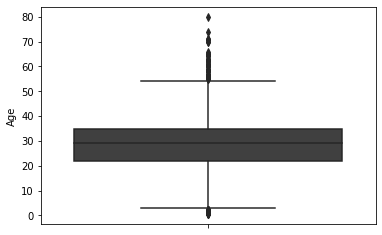

In [35]:
ax = sns.boxplot(y="Age", data=titanic, color=".25")


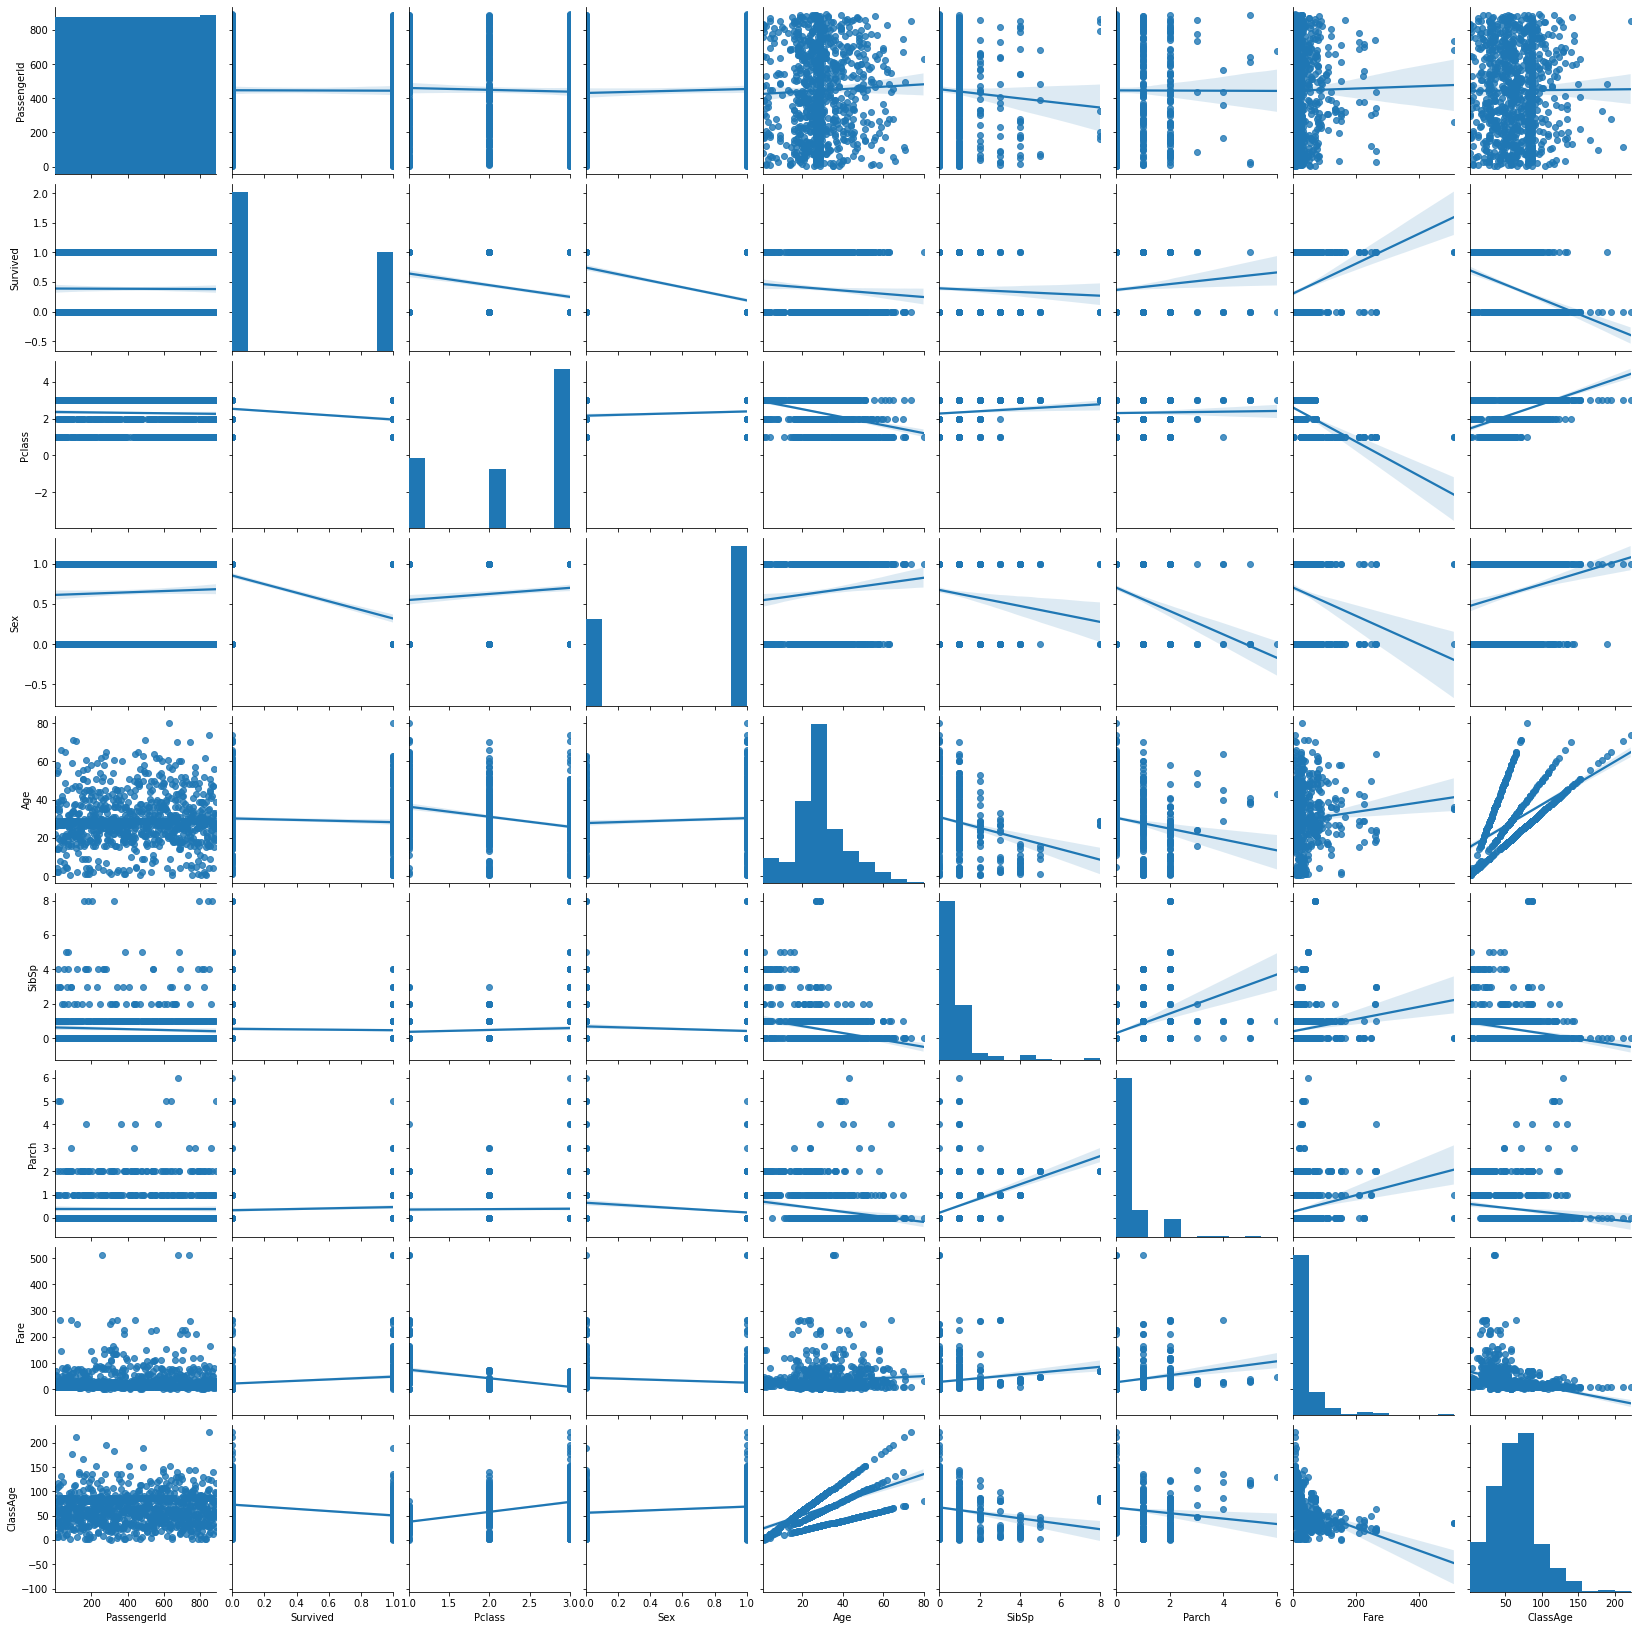

In [36]:
sns.pairplot(titanic, kind="reg")
plt.show()

In [0]:
#titanic.drop([titanic['Age'] >= 70])
titanic.drop(titanic[titanic.Age >= 70].index, inplace=True)

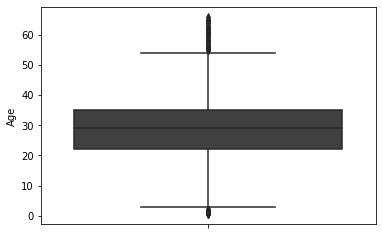

In [38]:
ax = sns.boxplot(y="Age", data=titanic, color=".25")
#outliers eliminados

In [0]:
titanic.drop(titanic[titanic.CabinSimp == 'T'].index, inplace=True)

In [40]:
titanic.duplicated()

458    False
880    False
303    False
79     False
82     False
       ...  
636    False
574    False
860    False
808    False
890    False
Length: 883, dtype: bool

In [41]:
#partch and siblings alltogether = FamilyCount
titanic['FamilyCount']=titanic['SibSp']+titanic['Parch']
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ClassAge,CabinSimp,FamilyCount
458,459,1,2,"Toomey, Miss. Ellen",0,50.0,0,0,F.C.C. 13531,10.5000,-999,S,100.0,F,0
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",0,25.0,0,1,230433,26.0000,-999,S,50.0,E,1
303,304,1,2,"Keane, Miss. Nora A",0,27.0,0,0,226593,12.3500,E101,Q,54.0,E,0
79,80,1,3,"Dowdell, Miss. Elizabeth",0,30.0,0,0,364516,12.4750,-999,S,90.0,F,0
82,83,1,3,"McDermott, Miss. Brigdet Delia",0,27.0,0,0,330932,7.7875,-999,Q,81.0,F,0
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",0,33.0,3,0,3101278,15.8500,-999,S,99.0,F,3
399,400,1,2,"Trout, Mrs. William H (Jessie L)",0,28.0,0,0,240929,12.6500,-999,S,56.0,D,0
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",0,33.0,1,2,C.A. 34651,27.7500,-999,S,66.0,D,3
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",0,23.0,0,0,SC/AH Basle 541,13.7917,D,C,46.0,D,0
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",0,40.0,1,1,29750,39.0000,-999,S,80.0,F,2


# Data Exploration / Analysis

Data Analysis
sexo comparando o count de sobrevivencia ao longo da idade - check

age com sobrevivência - check

FamilyCount com taxa de sobrevivência - check

class com a taxa de sobrevivência - check

cabinSimp com a taxa de sobrevivência - check

Embarked com a taxa de sobrevivência - check

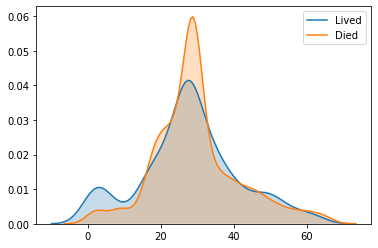

In [42]:
orange = sns.light_palette("orange", as_cmap=True)
x1 = titanic.loc[titanic.Survived == 1, 'Age']
x2 = titanic.loc[titanic.Survived == 0, 'Age']

#ax = sns.scatterplot(x="Age", y="Survived", hue="Sex", #data=titanic)
#plt.hist(x1, color='g', label='Ideal', color=r)
#plt.hist(x2, color='g', label='Ideal')

sns.kdeplot(x1, label = 'Lived', shade=True)
sns.kdeplot(x2, label = 'Died', shade=True)
#é notável que as crianças tiveram mais prob de sobrevivencia.
#20/40 anos foram quem sofreu mais perdas.

Text(0.5, 1.0, 'Male')

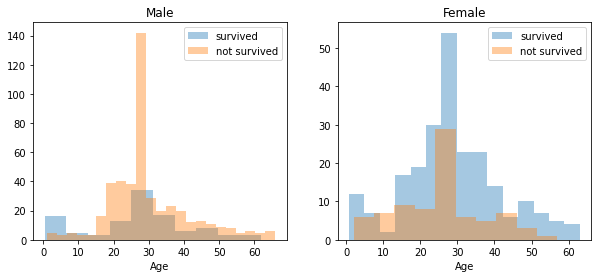

In [43]:
#para as labels
survived = 'survived'
not_survived = 'not survived'

#quantos gráficos numa linha
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

#groupby 
women = titanic[titanic['Sex']==0]
men = titanic[titanic['Sex']==1]

#primeiro chart
ax = sns.distplot(women[women['Survived']==1].Age,  label = survived, ax = axes[1], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age, label = not_survived, ax = axes[1], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(),  label = survived, ax = axes[0], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(),  label = not_survived, ax = axes[0], kde = False)


#a legend vai de acordo com a label
ax.legend()
ax.set_title('Male')

#morreram mais homens do que sobreviveram
#sobreviveram mais mulheres do que morreram
#Existe maior probabilidade de sobreviver entre:
#0<x<7; 19<x<37 anos
#existe maior probabilidade da mulher sobreviver entre:
#0<x<9 ; 15<x<40; >45 anos 

Text(0.5, 1.0, 'FamilyCount by Survival')

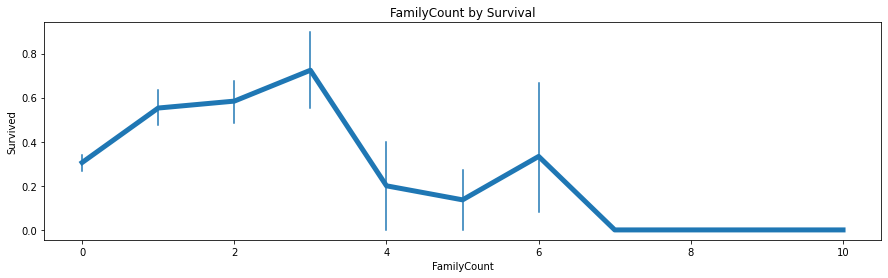

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,4))
#groupby
#survived = titanic[titanic['Survived'] == 1]
#not_survived = titanic[titanic['Survived']== 0]

ax2 = sns.lineplot (x="FamilyCount", y="Survived", err_style ="bars", data=titanic,
                   lw=5)
ax2.set_title("FamilyCount by Survival")

#A taxa de sobrevivência diminui com o aumento do # da familia
#existe uma maior probabilidade de sobreviver se tiverem menos FamilYCount

Text(0.5, 1.0, 'Class by Survival Rate')

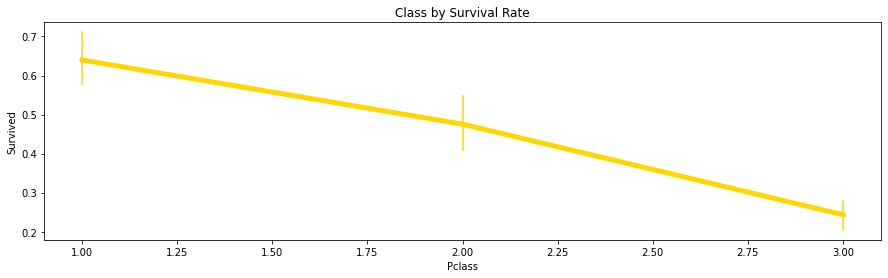

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,4))
#groupby
#survived = titanic[titanic['Survived'] == 1]
#not_survived = titanic[titanic['Survived']== 0]

ax3 = sns.lineplot (x="Pclass", y="Survived", err_style ="bars", data=titanic,
                   color="gold", lw=5)
ax3.set_title("Class by Survival Rate")

#A taxa de sobrevivência diminui com a classe da pessoa
#existe uma maior probabilidade de sobreviver sendo da 1st class (varia entre 0.54<x<0.71)

Text(0.5, 1.0, 'Cabin level by Survival Rate')

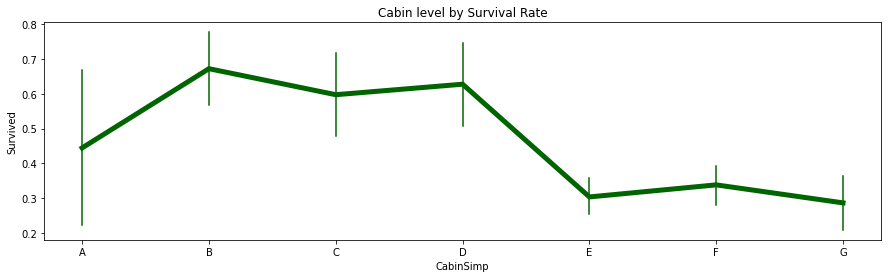

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,4))
#groupby
#survived = titanic[titanic['Survived'] == 1]
#not_survived = titanic[titanic['Survived']== 0]

ax4 = sns.lineplot (x="CabinSimp", y="Survived", err_style ="bars", data=titanic,
                   color="darkgreen", lw=5
                    )
ax4.set_title("Cabin level by Survival Rate")

#A taxa de sobrevivência diminui com a cabine que estava presente (andar do navio)
#existe uma maior probabilidade de sobreviver sendo da cabine B C e D (varia entre 0.45<x<0.8)

Text(0.5, 1.0, 'Embarked by Survival Rate')

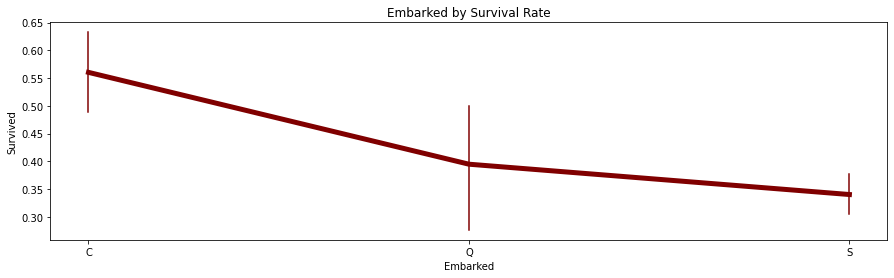

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,4))
#groupby
#survived = titanic[titanic['Survived'] == 1]
#not_survived = titanic[titanic['Survived']== 0]

ax5 = sns.lineplot (x="Embarked", y="Survived", err_style ="bars", data=titanic,
                    color="maroon", lw=5
                    )
ax5.set_title("Embarked by Survival Rate")

#A taxa de sobrevivência diminui com o local de embarque que estava presente 
#existe uma maior probabilidade de sobreviver sendo do embarque C (varia entre 0.5<x<0.64)
#no entanto, Southampton foi muito baixo também devida à vasta quantidade de pessoas que entraram

In [0]:
newcategory = pd.cut(titanic.Age,bins=[0,3,17,40,65,99],labels=['Toddler/baby','Child','YoungAdult','Adult','Elderly'])
titanic.insert(5,'Age Group', newcategory)


Text(0.5, 1.0, 'THIRD CLASS')

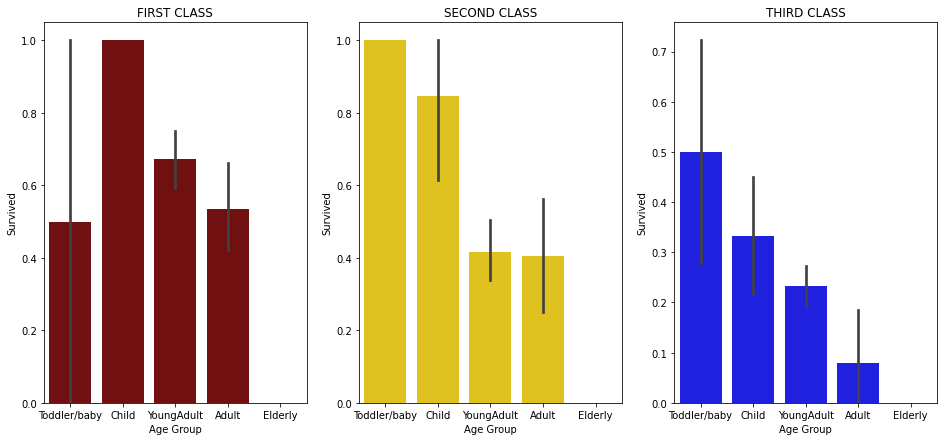

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,7))
#groupby
pclass1 = titanic[titanic['Pclass'] == 1]
pclass2 = titanic[titanic['Pclass']== 2]
pclass3 = titanic[titanic['Pclass']== 3]

ax6 = sns.barplot(x="Age Group", y="Survived", data=pclass1,
                    color="maroon", lw=2, ax=axes[0]
                    )
ax6.set_title("FIRST CLASS")

ax7 = sns.barplot (x="Age Group", y="Survived", data=pclass2,
                    color="gold", lw=2, ax=axes[1]
                    )
ax7.set_title("SECOND CLASS")

ax8 = sns.barplot (x="Age Group", y="Survived", data=pclass3,
                    color="blue", lw=2, ax=axes[2]
                    )
ax8.set_title("THIRD CLASS")

#100% sobrevivência 2nd class Toddler/baby
#50% sobrevivência 1st class toddler/baby
#100% sobrevivência 1st class child
#82% sobrevivência 2nd class child

Text(0.5, 1.0, 'Male')

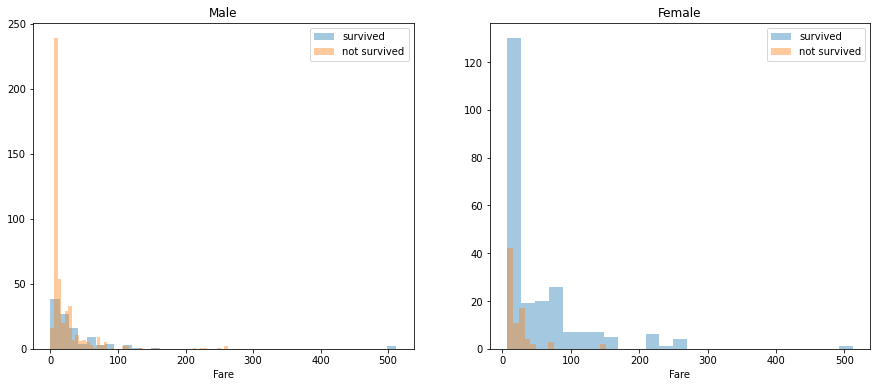

In [50]:
#quantos gráficos numa linha
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))

#groupby 
women = titanic[titanic['Sex']==0]
men = titanic[titanic['Sex']==1]

#primeiro chart
ax = sns.distplot(women[women['Survived']==1].Fare,  label = survived, ax = axes[1], kde =False)
ax = sns.distplot(women[women['Survived']==0].Fare, label = not_survived, ax = axes[1], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Fare.dropna(),  label = survived, ax = axes[0], kde = False)
ax = sns.distplot(men[men['Survived']==0].Fare.dropna(),  label = not_survived, ax = axes[0], kde = False)


#a legend vai de acordo com a label
ax.legend()
ax.set_title('Male')

#consegue-se observar que no sexo feminino quem pagou mais pelo bilhete teve menos mortes 
#no sexo masculino não é possível identificar um padrão. Deve-se fazer um scatter de hue=survived, x=idade, y=fare 
#para men e women

Text(0.5, 1.0, 'Male')

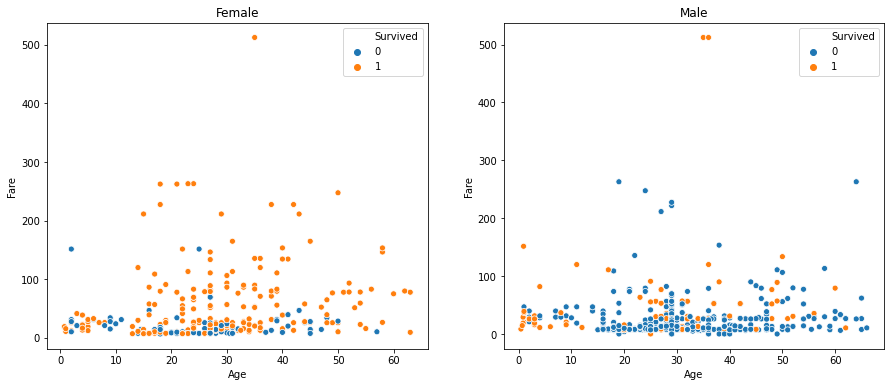

In [51]:
#quantos gráficos numa linha
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))

women = titanic[titanic['Sex']==0]
men = titanic[titanic['Sex']==1]

#ax = sns.scatterplot (x="Age", y="Fare", hue="Survived", data=titanic
                    #)

ax = sns.scatterplot (x="Age", y="Fare", hue="Survived", data=women,
                    ax = axes[0])
ax.legend()
ax.set_title('Female')

ax = sns.scatterplot (x="Age", y="Fare", hue="Survived", data=men, ax=axes[1]
                    )

ax.legend()
ax.set_title('Male')

#quem pagou mais E seja mulher tem maiores probabilidades de sobreviência

In [52]:
#filter1 = titanic[titanic["Age Group"] == 'Adult']
#filter1[filter1["Pclass"] == 1].count()

crosstabclass = pd.crosstab([titanic['Age Group'], titanic.Pclass], titanic['Survived'], 
                           ).style.background_gradient(cmap="Greens")
crosstabclass

In [53]:
#0 morreu - 1 Sobreviveu
#orange = sns.light_palette("orange", as_cmap=True)


crosstabclass = pd.crosstab(titanic['CabinSimp'], titanic['Survived'], 
                            margins=True).style.background_gradient(cmap="Greens")
crosstabclass

Survived,0,1,All
CabinSimp,,,
A,10,8,18
B,22,45,67
C,27,40,67
D,22,37,59
E,197,86,283
F,172,88,260
G,92,37,129
All,542,341,883


In [54]:
crosstabclass = pd.crosstab(titanic['Pclass'], titanic['Survived'], margins=True).style.background_gradient(cmap="Greens")
crosstabclass

Survived,0,1,All
Pclass,,,
1,76,135,211
2,96,87,183
3,370,119,489
All,542,341,883


In [55]:
#masculino = 1 feminino = 0
crosstabclass = pd.crosstab(titanic['Sex'], titanic['Survived'],  normalize='columns', margins=True, margins_name ='Total').style.background_gradient(cmap="Greens")
#crosstabclass = pd.crosstab(titanic['Sex'], titanic['Survived'], values=titanic.Pclass,  aggfunc='mean').round(0)
crosstabclass

Survived,0,1,Total
Sex,,,
0,0.149446,0.683284,0.355606
1,0.850554,0.316716,0.644394


In [56]:
#embarked in Cherbourg (C) , Queenstown (Q), Southampton (S)
crosstabclass = pd.crosstab(titanic['Embarked'], titanic['Survived'], margins=True).style.background_gradient(cmap="Greens")
crosstabclass

Survived,0,1,All
Embarked,,,
C,73,93,166
Q,46,30,76
S,423,218,641
All,542,341,883


In [57]:
crosstabclass = pd.crosstab([titanic.Embarked, titanic.Pclass], titanic['Survived'], margins=True).style.background_gradient(cmap="Greens")
crosstabclass

In [58]:
pd.crosstab(index=[titanic['Pclass'], titanic['CabinSimp']], 
            columns=[titanic['Survived'], titanic['Sex']],).style.background_gradient(cmap="Greens")


Data Processing

# Data Processing and Preparation

In [59]:
#colocar cabine, embarked, title por 0 e 1
#é necessário colocar a quantidade de MR Master and so on

titanic['CabinSimp'] = titanic.CabinSimp.replace({'A': '0', 'B':'1', 'C':'2', 'D':'3', 'E':'4', 'F':'5', 'G':'6'}).astype(int)
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age Group,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ClassAge,CabinSimp,FamilyCount
458,459,1,2,"Toomey, Miss. Ellen",0,Adult,50.0,0,0,F.C.C. 13531,10.5,-999,S,100.0,5,0
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",0,YoungAdult,25.0,0,1,230433,26.0,-999,S,50.0,4,1


In [60]:
titanic['Age Group'] = titanic['Age Group'].replace({'Toddler/baby': '0', 'Child':'1', 'YoungAdult':'2', 'Adult':'3', 'Elderly':'4'}).astype(int)
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age Group,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ClassAge,CabinSimp,FamilyCount
458,459,1,2,"Toomey, Miss. Ellen",0,3,50.0,0,0,F.C.C. 13531,10.5,-999,S,100.0,5,0
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",0,2,25.0,0,1,230433,26.0,-999,S,50.0,4,1


In [0]:
Title =  titanic["Name"].str.split(",", n=2, expand = True)
titanic['Title2'] = Title[1]
title2 = titanic['Title2'].str.split(".", n=1, expand=True)
titanic['Title']=title2[0]
titanic.drop('Title2', axis=1, inplace=True)
titanic.drop('Name', axis=1, inplace=True)

In [62]:
titanic.drop('ClassAge', axis=1, inplace=True)
titanic.drop('SibSp', axis=1, inplace=True)
titanic.drop('Parch', axis=1, inplace=True)
titanic.head(2)

,PassengerId,Survived,Pclass,Sex,Age Group,Age,Ticket,Fare,Cabin,Embarked,CabinSimp,FamilyCount,Title
458,459,1,2,0,3,50.0,F.C.C. 13531,10.5,-999,S,5,0,Miss
880,881,1,2,0,2,25.0,230433,26.0,-999,S,4,1,Mrs


In [63]:
titanic['Embarked'] = titanic['Embarked'].replace({'S': '0', 'Q':'1', 'C':'2'}).astype(int)
titanic.head(2)

,PassengerId,Survived,Pclass,Sex,Age Group,Age,Ticket,Fare,Cabin,Embarked,CabinSimp,FamilyCount,Title
458,459,1,2,0,3,50.0,F.C.C. 13531,10.5,-999,0,5,0,Miss
880,881,1,2,0,2,25.0,230433,26.0,-999,0,4,1,Mrs


In [64]:
titanic.drop('Cabin', axis=1, inplace=True)
titanic.drop('Ticket', axis=1, inplace=True)
titanic.drop('PassengerId', axis=1, inplace=True)
titanic.head(2)

,Survived,Pclass,Sex,Age Group,Age,Fare,Embarked,CabinSimp,FamilyCount,Title
458,1,2,0,3,50.0,10.5,0,5,0,Miss
880,1,2,0,2,25.0,26.0,0,4,1,Mrs


In [65]:
titanic.Title.value_counts()
#temos de traduzir isto para um range de palavras mais pequeno
#Mlle - mademouseille
#Mme - monsieur 
#Jonkheer - noble
#Ms - miss as well
#Rev - Reverend

 Mr              510
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Mlle              2
 Col               2
 Sir               1
 Don               1
 Lady              1
 Jonkheer          1
 Ms                1
 the Countess      1
 Mme               1
Name: Title, dtype: int64

In [66]:
titanic['Title'] = titanic['Title'].replace({' Mr':'0', ' Mrs':'1', ' Miss':'2', ' Master':'3',
                                             ' Dr':'4', ' Rev':'5',' Col': '6',
                                             ' Mlle':'2', ' Major':'6',
                                             ' Mme':'0', ' Lady':'2', ' Jonkheer':'7',
                                             ' Sir':'7', ' Don':'7', ' Ms':'2',
                                             ' the Countess':'7'}).astype(int)
                                   
titanic.Title.value_counts()

0    511
2    186
1    125
3     40
4      7
5      6
7      4
6      4
Name: Title, dtype: int64

# Data Modeling

In [0]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [68]:
titanic.head()

,Survived,Pclass,Sex,Age Group,Age,Fare,Embarked,CabinSimp,FamilyCount,Title
458,1,2,0,3,50.0,10.5000,0,5,0,2
880,1,2,0,2,25.0,26.0000,0,4,1,1
303,1,2,0,2,27.0,12.3500,1,4,0,2
79,1,3,0,2,30.0,12.4750,0,5,0,2
82,1,3,0,2,27.0,7.7875,1,5,0,2


In [69]:
#é necessário criar dummy classes para distinguir as features por coluna De forma a que o 
#modelo consiga modelar os dados com maior fiabilidade
dummy = pd.get_dummies(titanic['Pclass'])
dummy= dummy.rename(columns = {1: "Pclass1", 2:"Pclass2", 3:"Pclass3"})
dummy.head(2)

,Pclass1,Pclass2,Pclass3
458,0,1,0
880,0,1,0


In [70]:
dummy2 = pd.get_dummies(titanic['Sex'])
dummy2= dummy2.rename(columns = {0: "Female", 1:"Male"})
dummy2.head(2)

,Female,Male
458,1,0
880,1,0


In [71]:
dummy3 = pd.get_dummies(titanic['Age Group'])
dummy3= dummy3.rename(columns = {0: "Toddler/baby", 1:"Child", 2:"YoungAdult", 3:"Adult", 4:"Elderly"})
dummy3.head(2)

,Toddler/baby,Child,YoungAdult,Adult,Elderly
458,0,0,0,1,0
880,0,0,1,0,0


In [72]:
dummy4 = pd.get_dummies(titanic['Embarked'])
dummy4= dummy4.rename(columns = {0: "Southampton", 1:"Queenstown", 2:"Cherbourg", 3:"Adult", 4:"Elderly"})
dummy4.head(2)

,Southampton,Queenstown,Cherbourg
458,1,0,0
880,1,0,0


In [73]:
dummy5 = pd.get_dummies(titanic['CabinSimp'])
dummy5= dummy5.rename(columns = {0: "CabA", 1:"CabB", 2:"CabC", 3:"CabD", 4:"CabE", 5:"CabF", 6:"CabG"})
dummy5.head(2)

,CabA,CabB,CabC,CabD,CabE,CabF,CabG
458,0,0,0,0,0,1,0
880,0,0,0,0,1,0,0


In [74]:
dummy6 = pd.get_dummies(titanic['Title'])
dummy6= dummy6.rename(columns = {0: "Mr", 1:"Mrs", 2:"Miss", 3:"Master", 4:"Dr",
                                 5:"Rev", 6:"Army", 7:"Nobles"})
dummy6.head(2)

,Mr,Mrs,Miss,Master,Dr,Rev,Army,Nobles
458,0,0,1,0,0,0,0,0
880,0,1,0,0,0,0,0,0


In [0]:
titanic = pd.concat([titanic, dummy6], axis=1)

In [0]:
titanic = pd.concat([titanic, dummy], axis=1)
titanic = pd.concat([titanic, dummy2], axis=1)
titanic = pd.concat([titanic, dummy3], axis=1)
titanic = pd.concat([titanic, dummy4], axis=1)
titanic = pd.concat([titanic, dummy5], axis=1)

In [77]:
titanic.head(2)

,Survived,Pclass,Sex,Age Group,Age,Fare,Embarked,CabinSimp,FamilyCount,Title,Mr,Mrs,Miss,Master,Dr,Rev,Army,Nobles,Pclass1,Pclass2,Pclass3,Female,Male,Toddler/baby,Child,YoungAdult,Adult,Elderly,Southampton,Queenstown,Cherbourg,CabA,CabB,CabC,CabD,CabE,CabF,CabG
458,1,2,0,3,50.0,10.5,0,5,0,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
880,1,2,0,2,25.0,26.0,0,4,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


Logistic Regression

In [0]:
#x features y response
#([titanic, dummy]
X = titanic.drop(['Survived', 'Fare', 'Age'], axis=1)
Y = titanic["Survived"]

In [0]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [81]:
xTrain.shape

(706, 35)

In [82]:
xTest.shape

(177, 35)

In [83]:
yTrain.shape

(706,)

In [84]:
yTest.shape

(177,)

In [85]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xTrain, yTrain)
y_pred = logreg.predict(xTrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [86]:
len(y_pred)

706

In [87]:
from sklearn import metrics
print (metrics.accuracy_score(yTrain, y_pred))

0.8271954674220963


In [88]:
#using the Test sample
test_pred = logreg.predict(xTest)
len(yTest)

177

In [89]:
#83% de fiabilidade na previsão de resultados usando o modelo Logistic Regression!
print (metrics.accuracy_score(yTest, test_pred))

0.8305084745762712


Logistic regression with continuous data

In [0]:
#x features y response
#([titanic, dummy]
X2 = titanic.drop(['Survived'], axis=1)
Y2 = titanic["Survived"]

In [91]:
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(X2, Y2, test_size = 0.2, random_state = 0)
xTrain2.shape
xTest2.shape
yTrain2.shape
yTest2.shape

(177,)

In [92]:
logreg2 = LogisticRegression()
logreg2.fit(xTrain2, yTrain2)
y_pred2 = logreg2.predict(xTrain2)
len(y_pred2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


706

In [93]:
print (metrics.accuracy_score(yTrain2, y_pred2))


0.8257790368271954


In [0]:
test_pred2 = logreg2.predict(xTest2)

In [95]:
print (metrics.accuracy_score(yTest2, test_pred2))

0.8305084745762712


In [96]:
# print the first 25 true and predicted responses
print('True:', yTest.values[0:25])
print('Pred:', test_pred[0:25])

True: [0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
Pred: [0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0]


In [97]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(yTest, test_pred))

[[96  7]
 [23 51]]


In [98]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(yTest, test_pred))

[[96  7]
 [23 51]]


Logistic Regression with Cross Validation

In [99]:
from sklearn.model_selection import cross_val_score
predicted = cross_val_score(LogisticRegression(), X, Y, cv=10)
#LogisticRegression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [100]:
#The mean score and the 95% confidence interval of the score estimate are hence given by:
print("LogReg Accuracy: %0.2f (+/- %0.2f)" % (predicted.mean()*100, predicted.std() * 3))

LogReg Accuracy: 77.70 (+/- 0.43)


Random Forest Model

In [101]:
from sklearn.ensemble import RandomForestClassifier
predictionForest = RandomForestClassifier(n_estimators=100)
scores_prediction = cross_val_score(predictionForest, X,
Y, cv = 5)
print (scores_prediction)
print (scores_prediction.mean())

[0.53107345 0.84180791 0.89265537 0.64204545 0.71022727]
0.7235618900873139


In [102]:
from sklearn.ensemble import RandomForestClassifier
predictionForest = RandomForestClassifier(n_estimators=1000)
scores_prediction = cross_val_score(predictionForest, X,
Y, cv = 5)
print (scores_prediction)
print (scores_prediction.mean())

[0.54237288 0.84745763 0.89265537 0.64772727 0.68181818]
0.7224062660503338


In [103]:
from sklearn.ensemble import RandomForestClassifier
predictionForest = RandomForestClassifier(n_estimators=10000)
scores_prediction = cross_val_score(predictionForest, X,
Y, cv = 5)
print (scores_prediction)
print (scores_prediction.mean())

[0.54237288 0.84745763 0.88135593 0.63636364 0.68181818]
0.7178736517719567


In [104]:
from pprint import pprint
pprint(predictionForest.get_params())
#n_estimators = number of trees in the foreset
#max_features = max number of features considered for splitting a node
#max_depth = max number of levels in each decision tree
#min_samples_split = min number of data points placed in a node before the node is split
#min_samples_leaf = min number of data points allowed in a leaf node
#bootstrap = method for sampling data points (wit

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
